In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [3]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1 ＃normalize輸入從0到255到0-1 normalize在检索数据时调用的函数
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)
#np_utils.to_categorical將y轉成one-hot的形式

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
#宣告採用序列模型 Sequence是Python的一种内置类型（built-in type），内置类型就是构建在Python Interpreter里面的类型，三种基本的Sequence Type是list（表），tuple（定值表，或翻译为元组），range（范围）。可以看作是Python Interpreter定义了
model = Sequential()

In [8]:
#建構輸入層
model.add(Dense(units=257, 
                input_dim=784, 
                kernel_initializer='normal',  #normal()的意思是一个正态分布
                activation='relu')) ## 激活函數是relu
# #Dense層屬於網絡層-
#kernel_initializer：权值初始化方法，为预定义初始化方法名的字符串，或用于初始化权重的初始化器。参考initializers

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))# 激活函數是softmax
#kernel_initializer：权值初始化方法，为预定义初始化方法名的字符串，或用于初始化权重的初始化器。参考initializers
#normal()的意思是一个正态分布
#Softmax回归函数是用于将分类结果归一化

In [10]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [11]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 8s 172us/step - loss: 0.2690 - acc: 0.9226 - val_loss: 0.1348 - val_acc: 0.9593
Epoch 2/10
48000/48000 [==============================] - 8s 160us/step - loss: 0.1095 - acc: 0.9672 - val_loss: 0.1042 - val_acc: 0.9692
Epoch 3/10
48000/48000 [==============================] - 8s 161us/step - loss: 0.0717 - acc: 0.9776 - val_loss: 0.0977 - val_acc: 0.9704
Epoch 4/10
48000/48000 [==============================] - 8s 162us/step - loss: 0.0503 - acc: 0.9845 - val_loss: 0.0800 - val_acc: 0.9775
Epoch 5/10
48000/48000 [==============================] - 8s 164us/step - loss: 0.0355 - acc: 0.9891 - val_loss: 0.0799 - val_acc: 0.9768
Epoch 6/10
48000/48000 [==============================] - 8s 164us/step - loss: 0.0261 - acc: 0.9917 - val_loss: 0.0806 - val_acc: 0.9768
Epoch 7/10
48000/48000 [==============================] - 8s 169us/step - 

In [12]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    ##validation_split：0~1之间的浮点数，用来指定训练集的一定比例数据作为验证集。验证集将不参与训练，并在每个epoch结束后测试的模型的指标，如损失函数，精确度等
    ##train_history 訓練歷史數據
    #legend 圖例
    #loc基於行標籤和列標籤（x_label、y_label）進行索引
    #upper left 左上

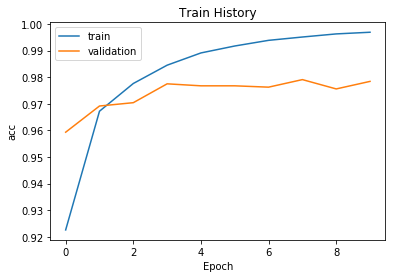

In [13]:
show_train_history(train_history,'acc','val_acc')
#ACC 好像是分類評計的一種
##acc是指模型訓練精度，val_acc是指模型在驗證集上的精度，loss是訓練的的損失值。

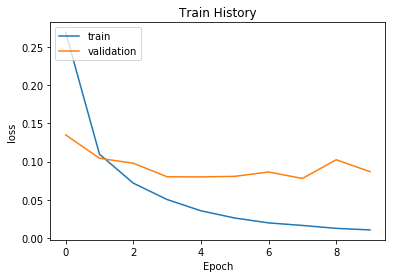

In [14]:
show_train_history(train_history,'loss','val_loss')

In [15]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 38us/step

accuracy= 0.9802
